# Training eines künstlichen Neurons


In [1]:
# Pakete laden 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial

## Lege die Parameter des Optimierungsalgorithmus fest

In [2]:
# Startwert
start_x = np.array([-2, 2])  
# Schrittweite
stepsize = 0.01
# Maximale Anzahl Iterationsschritte
num_steps = 100000

## Funktionsgleichung eines künstlichen Neurons

In folgendem Codefeld wird die Funktionsgleichung eines Neurons definiert. Dabei handelt es sich um eine Funktion mit den beiden Variablen $w=(weight,bias)$. Dies sind auch die Variablen, die wir basierend auf einem Datensatz optimal bestimmen möchten. Die Funktionsgleichung lautet: 

$\text{neuron}(w,x)= \frac{1}{1+\exp(-(w\cdot x +b))}$.

Diese Gleichung wird oft auch geschrieben als  
$\text{neuron}(w,x)= \sigma (w\cdot x +b)$, wobei $\sigma(x) = \frac{1}{1+\exp(-x)}$.  
Die Funktion $\sigma$ wird auch Sigmoid-Funktion genannt. 

In [3]:
# Definiere die Gleichung des Neurons

def neuron(w, x):
    weight, bias = w
    z = weight * x + bias
    return 1 / (1 + np.exp(-z))


## Erzeugung eines Datensatzes

Ziel ist es mithilfe der Neuron-Funktion die y-Werte zu verschiedenen x-Werten möglichst genau vorherzusagen. 
Für einen Datenpunkt $(x_i,y_i)$ sollte also möglichst gelten: $\text{neuron}(w,x_i)\approx y_i$.

Zunächst erzeugen wir einen Datensatz. Dieser besteht aus $x$-Werten, die zwischen -5 und 5 liegen, und den zugehörigen $y$-Werten. Die $y$-Werte können nur den Wert $0$ und $1$ annehmen. 
Ein Wert von $0$ zeigt an, dass der Datenpunkt der Klasse A angehört. Ein Wert von $1$ zeigt an, dass der Datenpunkt der Klasse B angehört.

In [4]:
# Erzeuge einen Datensatz

def generate_classification_data():
    np.random.seed(42)
    x = np.random.uniform(-5, 5, 100)
    y = (x > 0).astype(float)   
    return pd.DataFrame({'x': x, 'y': y})

# Prepare data and functions
data = generate_classification_data()   
X = data['x'].values
y = data['y'].values

print("Die x-Werte lauten:\n", X)
print("Die y-Werte lauten:\n", y)

Die x-Werte lauten:
 [-1.25459881  4.50714306  2.31993942  0.98658484 -3.4398136  -3.4400548
 -4.41916388  3.66176146  1.01115012  2.08072578 -4.79415506  4.69909852
  3.32442641 -2.87660889 -3.18175033 -3.1659549  -1.95757757  0.24756432
 -0.68054981 -2.0877086   1.11852895 -3.60506139 -2.07855351 -1.33638157
 -0.43930016  2.85175961 -3.00326218  0.14234438  0.92414569 -4.53549587
  1.07544852 -3.29475876 -4.34948407  4.48885537  4.65632033  3.08397348
 -1.95386231 -4.02327886  1.84233027 -0.59847506 -3.77961765 -0.0482309
 -4.65611479  4.09320402 -2.41220018  1.62522284 -1.88288924  0.20068021
  0.46710279 -3.15145544  4.69584628  2.75132823  4.39498942  3.9482735
  0.97899979  4.21874235 -4.11507498 -3.04017138 -4.54772711 -1.74669669
 -1.1132271  -2.28650968  3.28737509 -1.43246673 -2.1906549   0.42696083
 -3.59075775  3.02196981 -4.25449356  4.86886937  2.72244769 -3.01284318
 -4.94477883  3.15461428  2.06857344  2.29007168  2.71270347 -4.25955348
 -1.41534271 -3.8413094   3.63103

## Die Fehlerfunktion
Um zu bewerten, wie nah die Vorhersagen der Neuron-Funktion an den tatsächlichen y-Werten liegen, definieren wir den Fehler als Summe der Fehlerquadrate Fehlerfunktion: 

$error=\sum_i{(\text{neuron}(w,x_i)- y_{true})^2}$

In [5]:
# Definiere die Fehlerfunktion 
def loss_function(w, X, y):
    predictions = neuron(w, X)
    return np.sum((predictions - y)**2)

In [6]:
# Bestimme den Gradienten der Fehlerfunktion

def gradient(w, X, y):
    
    weight, bias = w
    z = weight * X + bias
    y_pred = 1 / (1 + np.exp(-z))
    error = y_pred - y
    dsigmoid = y_pred * (1 - y_pred)  # Ableitung der äußeren Funktion
    
    dw = 2 * np.mean(error * dsigmoid * X)
    db = 2 * np.mean(error * dsigmoid)
    
    return np.array([dw, db])

In [7]:
# Speichere die Fehlerfunktion und den Gradienten so, dass die Funktionen
# nur noch von den Variablen der Optimierung abhängen

grad_f = partial(gradient, X=X, y=y)
f = partial(loss_function, X=X, y=y)

## Gradientenverfahren

In [8]:
# Definiere das Gradientenverfahren

def gradient_descent(f, grad_f, start_x, stepsize, num_steps, tol=1e-6):
    x = start_x
    iterations = [x]
    
    for i in range(num_steps):
        grad = grad_f(x)
        new_x = x - stepsize * grad
        
        iterations.append(new_x)
        
        # Abbruchbedingung, wenn die Änderung klein ist
        if np.linalg.norm(new_x - x) < tol:
            break
        
        if np.linalg.norm(f(new_x) - f(x)) < tol:
            break
        
        x = new_x
    
    # Gib das Ergebnis aus
    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))
    print("Anzahl Iterationsschritte:", len(np.array(iterations)))   
    
    len(iterations)
    return np.array(iterations), x, f(x)

# Wende das Gradientenverfahren an
iterations, optimal_x, optimal_y = gradient_descent(f, grad_f, start_x, stepsize, num_steps)

Optimales x: [ 4.8128 -0.0304]
Minimalwert von f(x): 0.7665
Anzahl Iterationsschritte: 100001


## Visualisierung der Zielfunktion und der Iterationsschritte

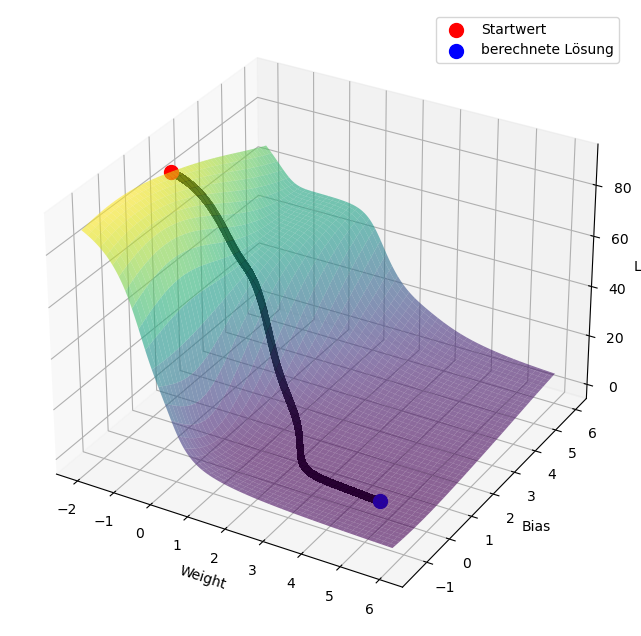

In [9]:
# Definiere eine Funktion zum Plotten
def plot_results(f, start_x, optimal_x, iterations):
    
    weight_vals = np.linspace(-2, 6, 400)
    bias_vals = np.linspace(-1.5, 6, 400)
    W, B = np.meshgrid(weight_vals, bias_vals)
    
    # Berechne den Graph der Zielfunktion 
    Z = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            Z[i,j] = f(np.array([W[i,j], B[i,j]]))
    
    # Create 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface
    ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.6,zorder = 1)
    
    # Calculate loss values for each iteration
    iteration_losses = np.array([f(w) for w in iterations])
    
    # Plot optimization path with correct dimensions
    ax.plot(iterations[:,0], iterations[:,1], iteration_losses, 
            'o-', markersize=4, color='black', linewidth=1, zorder = 2)
    
    # Add markers
    ax.scatter(start_x[0], start_x[1], f(start_x), 
               c='red', s=100, label='Startwert', zorder = 2)
    ax.scatter(optimal_x[0], optimal_x[1], f(optimal_x), 
               c='blue', s=100, label='berechnete Lösung', zorder = 2)
    
    ax.set_xlabel('Weight')
    ax.set_ylabel('Bias')
    ax.set_zlabel('Loss')
    plt.legend()
    plt.show()

# Rufe die Plot-Funktion auf 
plot_results(f, start_x, optimal_x, iterations)
